In [1]:
from lensid.utils.ml_utils import *

2021-09-02 21:42:02.298508: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-02 21:42:02.298544: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
indir= 'test'
#df_dir='../../data/dataframes/test/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/' ##CIT

In [3]:
#blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
#blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

blu_lensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Unlensed_PE_blus.csv'



In [5]:
df_lensed_sky = pd.read_csv(df_dir+'lensed_sky.csv',index_col=[0] )
df_unlensed_sky = pd.read_csv(df_dir+'unlensed_sky.csv' ,index_col=[0])


df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_sky=df_lensed_sky.join(df_test_blu_lensed[cols])
df_unlensed_sky=df_unlensed_sky.join(df_test_blu_unlensed[cols])
df_test_sky = pd.concat([df_lensed_sky,df_unlensed_sky],ignore_index = True)
df_test_sky=df_test_sky.sample(frac = 1).reset_index(drop = True)

In [6]:
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,539925500.000000000-79851,662411500.000000000-324823,0,0.064115,0.000517,0.007136,0.131712,2.621429e-104,2.094243e-178,7.060003e-82,6.606703e-117,2.762155e-229,3.268758e-246
499788,513045000.000000000-26090,645946500.000000000-291893,0,0.376344,0.003034,0.110852,0.130537,1.845847e-96,1.898632e-140,2.471768e-246,3.811210e-101,3.934678e-167,2.399154e-59
499789,574757500.000000000-149515,581965500.000000000-163931,0,0.029113,0.000235,0.011322,0.120512,3.533129e-01,9.453799e-01,9.065842e-01,5.296746e-01,1.424776e+00,1.289536e+00
499790,626319000.000000000-252638,510473500.000000000-20947,0,1.328564,0.010712,0.239242,0.132966,2.017116e-01,4.702509e-01,5.903431e-01,2.558843e-01,5.140724e-01,1.043715e+00
499791,513984500.000000000-27969,644989500.000000000-289979,0,0.345810,0.002788,0.029475,0.297573,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.807228e-96


In [7]:
xgboost_sky_model = joblib.load('../training_cv/out/XGBsky_0.pkl')

In [8]:
df_test_sky=XGB_predict(df_test_sky,xgboost_sky_model)
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_pred_bayestar_skymaps
499787,539925500.000000000-79851,662411500.000000000-324823,0,0.064115,0.000517,0.007136,0.131712,2.621429e-104,2.094243e-178,7.060003e-82,6.606703e-117,2.762155e-229,3.268758e-246,0.000004
499788,513045000.000000000-26090,645946500.000000000-291893,0,0.376344,0.003034,0.110852,0.130537,1.845847e-96,1.898632e-140,2.471768e-246,3.811210e-101,3.934678e-167,2.399154e-59,0.000006
499789,574757500.000000000-149515,581965500.000000000-163931,0,0.029113,0.000235,0.011322,0.120512,3.533129e-01,9.453799e-01,9.065842e-01,5.296746e-01,1.424776e+00,1.289536e+00,0.000005
499790,626319000.000000000-252638,510473500.000000000-20947,0,1.328564,0.010712,0.239242,0.132966,2.017116e-01,4.702509e-01,5.903431e-01,2.558843e-01,5.140724e-01,1.043715e+00,0.000144
499791,513984500.000000000-27969,644989500.000000000-289979,0,0.345810,0.002788,0.029475,0.297573,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.807228e-96,0.000003


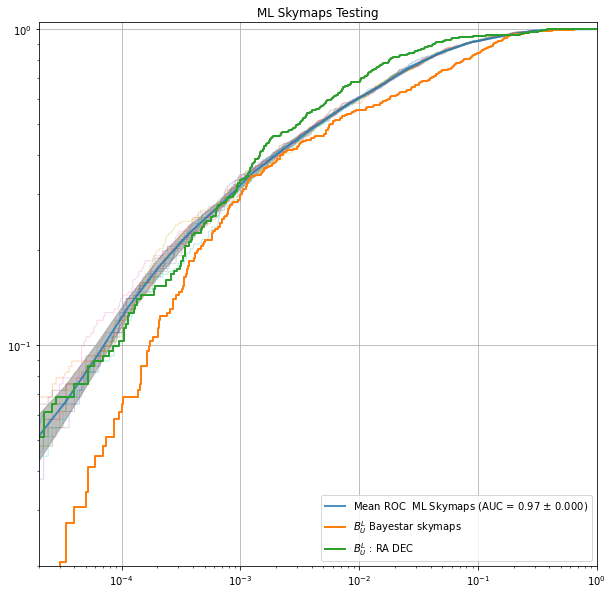

In [9]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_sky_cv = joblib.load("../training_cv/out/XGBsky_"+str(i)+".pkl")
    df = XGB_predict(df_test_sky,xgb_sky_cv)
    df_test_sky['xgb_pred_bayestar_skymaps_' +str(i) ]=df['xgb_pred_bayestar_skymaps']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_sky.Lensing.values, df_test_sky['xgb_pred_bayestar_skymaps_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC  ML Skymaps (AUC = %0.2f $\pm$ %0.3f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['bayestar_skymaps_blu','ra, sin_dec']
labels=['$B^L_U$ Bayestar skymaps','$B^L_U$ : RA DEC']
for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_sky.Lensing.values, df_test_sky[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=2)

ax.set(xlim=[2e-5,1],ylim=[2e-2,1.05],title = "ML Skymaps Testing",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
plt.savefig('plots/ROC-log-skymaps.png')

plt.show()


In [10]:
df_test_sky.tail()

,img_0,img_1,Lensing,bayestar_skymaps_blu,bayestar_skymaps_d2,bayestar_skymaps_d3,bayestar_skymaps_lsq,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec",...,xgb_pred_bayestar_skymaps_1,xgb_pred_bayestar_skymaps_2,xgb_pred_bayestar_skymaps_3,xgb_pred_bayestar_skymaps_4,xgb_pred_bayestar_skymaps_5,xgb_pred_bayestar_skymaps_6,xgb_pred_bayestar_skymaps_7,xgb_pred_bayestar_skymaps_8,xgb_pred_bayestar_skymaps_9,xgb_pred_bayestar_skymaps_10
499787,539925500.000000000-79851,662411500.000000000-324823,0,0.064115,0.000517,0.007136,0.131712,2.621429e-104,2.094243e-178,7.060003e-82,...,0.000005,0.000005,0.000005,0.000005,0.000004,0.000005,0.000005,0.000005,0.000005,0.000004
499788,513045000.000000000-26090,645946500.000000000-291893,0,0.376344,0.003034,0.110852,0.130537,1.845847e-96,1.898632e-140,2.471768e-246,...,0.000007,0.000006,0.000005,0.000005,0.000004,0.000005,0.000006,0.000005,0.000006,0.000006
499789,574757500.000000000-149515,581965500.000000000-163931,0,0.029113,0.000235,0.011322,0.120512,3.533129e-01,9.453799e-01,9.065842e-01,...,0.000006,0.000007,0.000006,0.000006,0.000006,0.000009,0.000008,0.000007,0.000006,0.000006
499790,626319000.000000000-252638,510473500.000000000-20947,0,1.328564,0.010712,0.239242,0.132966,2.017116e-01,4.702509e-01,5.903431e-01,...,0.000109,0.000138,0.000105,0.000116,0.000115,0.000113,0.000100,0.000114,0.000086,0.000104
499791,513984500.000000000-27969,644989500.000000000-289979,0,0.345810,0.002788,0.029475,0.297573,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000004,0.000002,0.000003,0.000003,0.000003,0.000004,0.000003,0.000004,0.000004,0.000004


In [12]:
#df_test_sky.to_csv('../../data/dataframes/test/ML_sky.csv')
df_test_sky.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_sky.csv')


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


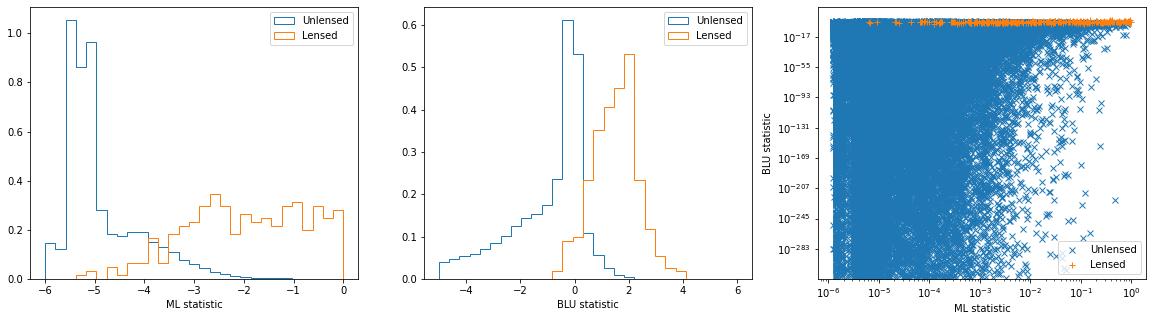

In [13]:
df_test=df_test_sky
ml_stat='xgb_pred_bayestar_skymaps'
blu_stat= 'ra, sin_dec'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-5,6,30)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


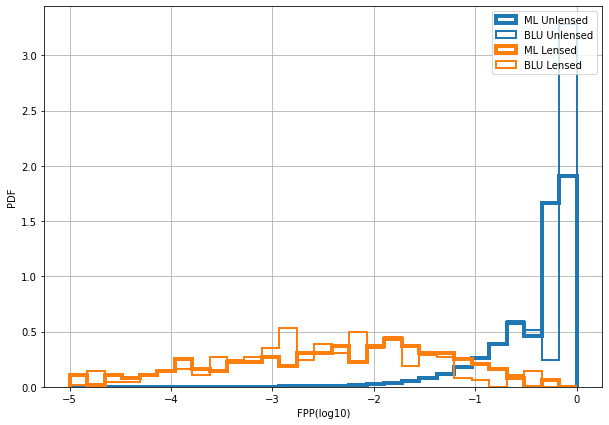

In [14]:
plt.figure(figsize=(10,7))
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()
plt.show()

ML skymaps auc = 0.9708
$B^L_U$ Bayestar skymaps auc = 0.9556
$B^L_U$ : RA DEC auc = 0.9777


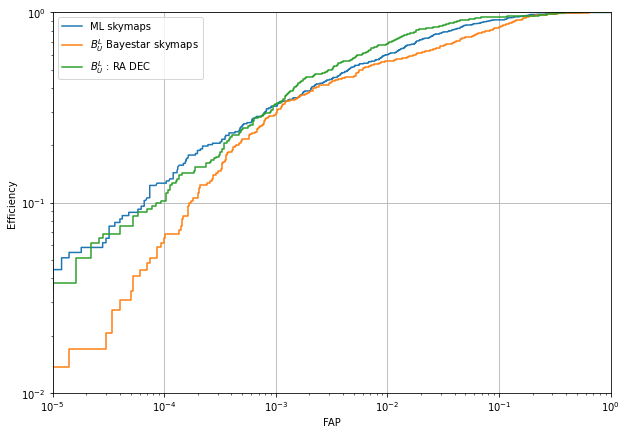

In [15]:
fig,rocs=plot_ROCs(df_test_sky,cols=['xgb_pred_bayestar_skymaps','bayestar_skymaps_blu','ra, sin_dec'],\
                                                                                 labels=['ML skymaps','$B^L_U$ Bayestar skymaps','$B^L_U$ : RA DEC'],logy=True,ylim=1e-2)

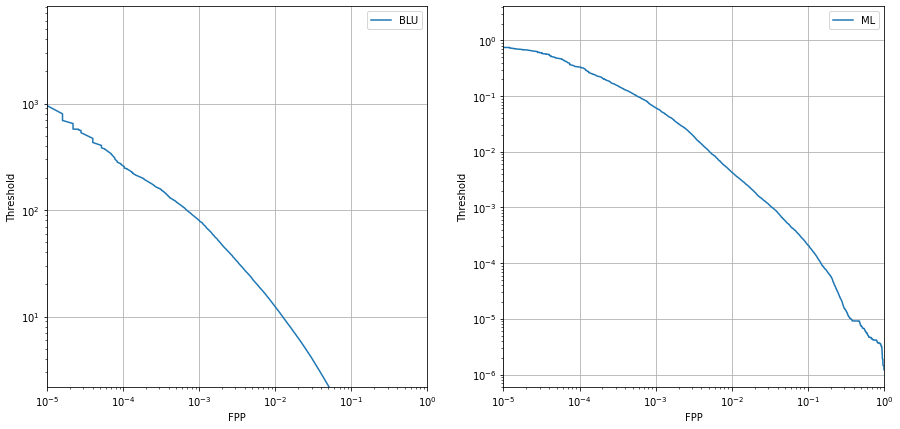

In [16]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [17]:
#df_test_sky.to_csv('../../data/dataframes/test/ML_sky.csv')
df_test_sky.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_sky.csv')
